# TP1 - Découverte et Valeurs Manquantes Simples

**Difficulté:** Débutant  
**Dataset:** ecommerce_simple.csv  
**Description:** Introduction au nettoyage avec gestion basique des valeurs manquantes

---


## Imports des Bibliothèques


In [5]:
# Bibliothèques de base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

# Affichage pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print(" Bibliothèques importées avec succès!")

 Bibliothèques importées avec succès!


## Import du Dataset


In [6]:
# Charger le dataset
df = pd.read_csv('ecommerce_simple.csv')

# Afficher les informations de base
print(f"📏 Dimensions: {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f" Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("\n" + "="*80 + "\n")

# Aperçu des données
display(df.head())
print("\n" + "="*80 + "\n")

# Informations sur les colonnes
df.info()

📏 Dimensions: 500 lignes × 8 colonnes
 Taille mémoire: 0.13 MB




,order_id,customer_id,product,price,quantity,category,order_date,shipping_address
0,1,8270,Laptop,1463.85,2,Accessories,2023-01-01 00:00:00,NaN
1,2,1860,Phone,761.59,3,Electronics,2023-01-01 01:00:00,"4 Main St, City"
2,3,6390,Phone,1098.20,4,Electronics,2023-01-01 02:00:00,NaN
3,4,6191,Headphones,1240.25,4,Accessories,2023-01-01 03:00:00,NaN
4,5,6734,Laptop,1091.76,3,Electronics,2023-01-01 04:00:00,NaN




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   product           500 non-null    object 
 3   price             455 non-null    float64
 4   quantity          500 non-null    int64  
 5   category          500 non-null    object 
 6   order_date        500 non-null    object 
 7   shipping_address  234 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB


## Visualisation des Valeurs Manquantes


<Figure size 1400x800 with 0 Axes>

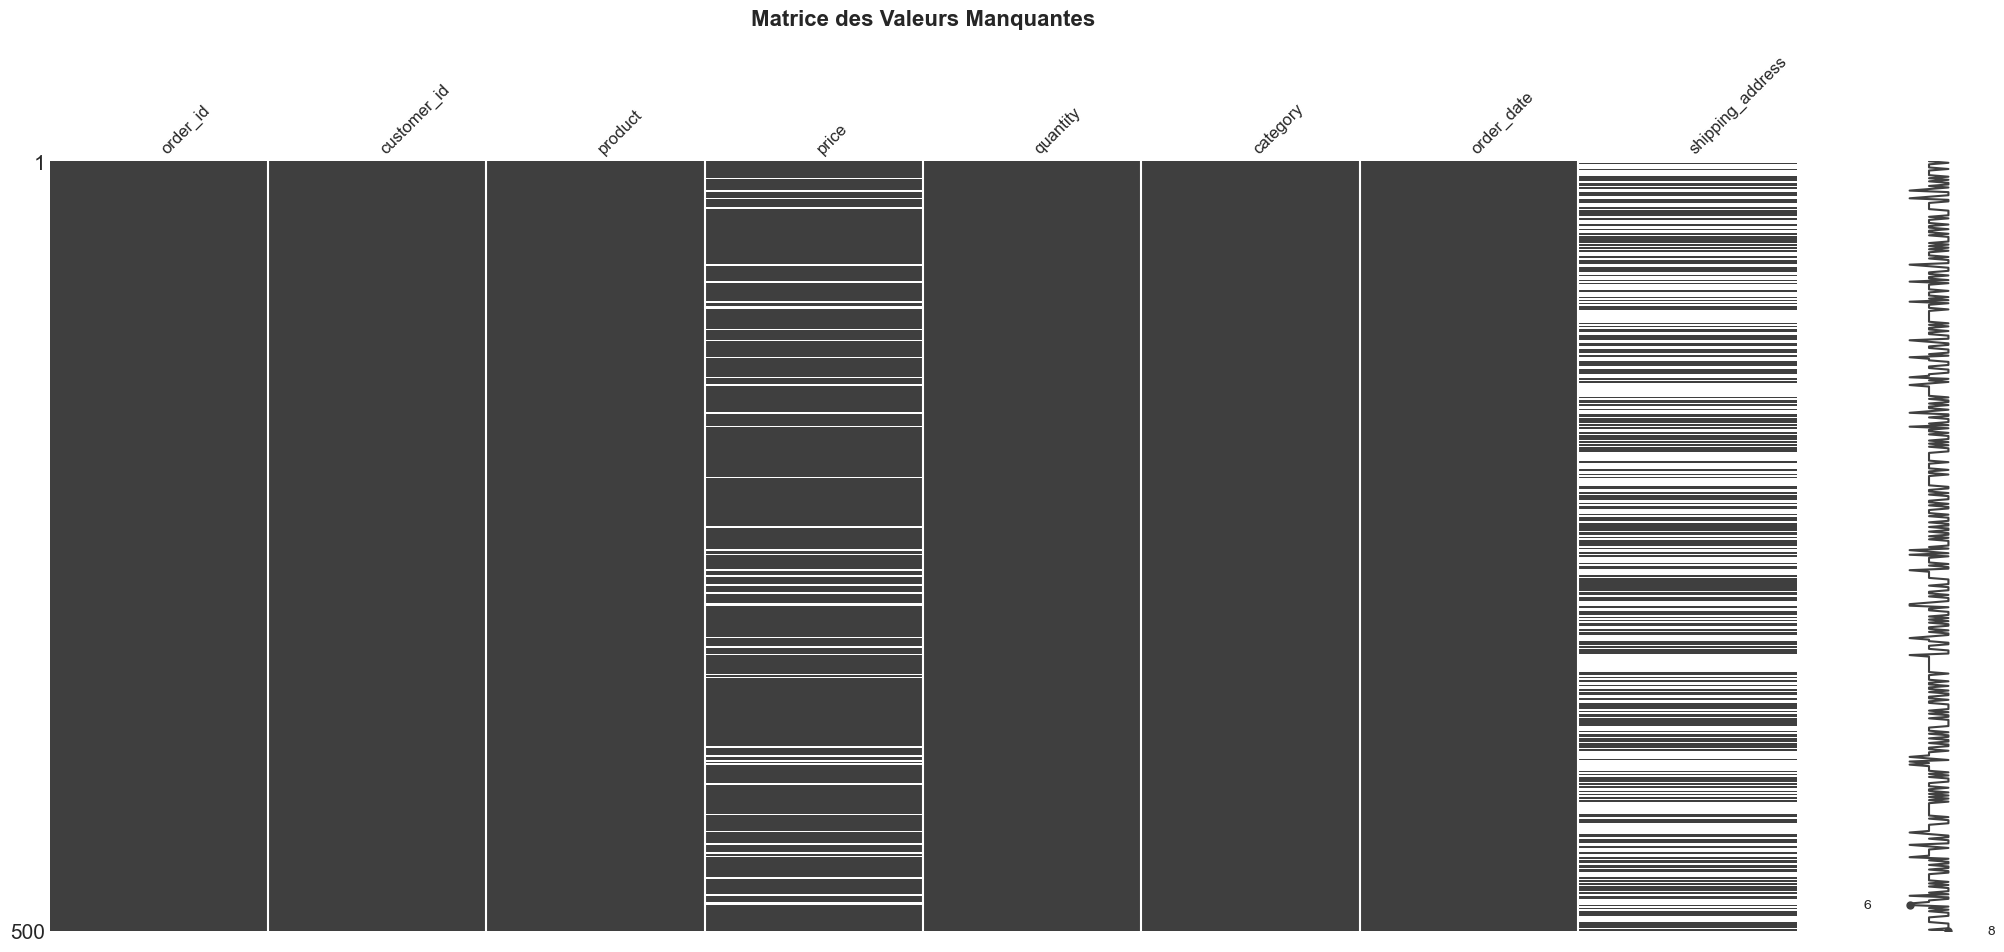


📊 Statistiques des Valeurs Manquantes:



,Nombre_Missing,Pourcentage_Missing
shipping_address,266,53.20
price,45,9.00


In [7]:
# Matrice de visualisation des valeurs manquantes
plt.figure(figsize=(14, 8))
msno.matrix(df, fontsize=12, sparkline=True)
plt.title("Matrice des Valeurs Manquantes", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Statistiques des valeurs manquantes
missing_stats = pd.DataFrame({
    'Nombre_Missing': df.isnull().sum(),
    'Pourcentage_Missing': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Pourcentage_Missing', ascending=False)

print("\n📊 Statistiques des Valeurs Manquantes:\n")
display(missing_stats[missing_stats['Nombre_Missing'] > 0])



In [68]:
cols_with_missing = df.columns[df.isnull().any()].tolist()
print(cols_with_missing)

['price', 'shipping_address']


In [69]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent)

order_id            0.00
customer_id         0.00
product             0.00
price               9.00
quantity            0.00
category            0.00
order_date          0.00
shipping_address   53.20
dtype: float64


In [70]:
complete_rows = df.dropna().shape[0]
print(complete_rows)

216


In [71]:
mean_price = df['price'].mean()
print(mean_price)

796.067956043956


In [72]:
unique_cat = df['category'].nunique()
print(unique_cat)

2


In [74]:
df['order_date'] = pd.to_datetime(df['order_date'])
oldest_date = df['order_date'].min()
print(oldest_date)

2023-01-01 00:00:00


## Questions Préalables

**Avant de commencer le TP, répondez aux questions suivantes en analysant le dataset:**

1. Combien de lignes et colonnes contient le dataset ?
2. Quelles colonnes contiennent des valeurs manquantes ?
3. Quel est le pourcentage de valeurs manquantes par colonne ?
4. Quelle colonne a le plus de valeurs manquantes ?
5. Y a-t-il des colonnes avec plus de 50% de valeurs manquantes ?
6. Combien de lignes sont complètes (sans aucune valeur manquante) ?
7. Quelle est la moyenne de la colonne 'price' ?
8. Combien de catégories uniques dans la colonne 'category' ?
9. Y a-t-il des valeurs négatives dans les colonnes numériques ?
10. Quelle est la date la plus ancienne dans le dataset ?


In [76]:
# Cellule pour vos réponses et analyses
# Utilisez cette cellule pour explorer les données et répondre aux questions

print("""Réponses aux questions: 
1. Combien de lignes et colonnes contient le dataset ? 500 lignes, 8 colonnes
2. Quelles colonnes contiennent des valeurs manquantes ? 'price', 'shipping_address'
3. Quel est le pourcentage de valeurs manquantes par colonne ? 9% dans la col "price", 53.20% dans la col "shipping_address"
4. Quelle colonne a le plus de valeurs manquantes ? "shipping_address" (266 val)
5. Y a-t-il des colonnes avec plus de 50% de valeurs manquantes ? oui, la "shipping_address"
6. Combien de lignes sont complètes (sans aucune valeur manquante) ? 216
7. Quelle est la moyenne de la colonne 'price' ? 796 
8. Combien de catégories uniques dans la colonne 'category' ? 2
9. Y a-t-il des valeurs négatives dans les colonnes numériques ? non
10. Quelle est la date la plus ancienne dans le dataset ? 2023-01-01 00:00:00
""")

Réponses aux questions: 
1. Combien de lignes et colonnes contient le dataset ? 500 lignes, 8 colonnes
2. Quelles colonnes contiennent des valeurs manquantes ? 'price', 'shipping_address'
3. Quel est le pourcentage de valeurs manquantes par colonne ? 9% dans la col "price", 53.20% dans la col "shipping_address"
4. Quelle colonne a le plus de valeurs manquantes ? "shipping_address" (266 val)
5. Y a-t-il des colonnes avec plus de 50% de valeurs manquantes ? oui, la "shipping_address"
6. Combien de lignes sont complètes (sans aucune valeur manquante) ? 216
7. Quelle est la moyenne de la colonne 'price' ? 796 
8. Combien de catégories uniques dans la colonne 'category' ? 2
9. Y a-t-il des valeurs négatives dans les colonnes numériques ? non
10. Quelle est la date la plus ancienne dans le dataset ? 2023-01-01 00:00:00



## Étapes du TP

**Suivez les étapes ci-dessous pour nettoyer le dataset:**

### Étape 1: Importer et afficher les 5 premières lignes du dataset
### Étape 2: Afficher les informations générales (df.info())
### Étape 3: Calculer le pourcentage de valeurs manquantes par colonne
### Étape 4: Supprimer les colonnes avec plus de 70% de valeurs manquantes
### Étape 5: Remplir les valeurs manquantes numériques avec la médiane
### Étape 6: Remplir les valeurs manquantes catégorielles avec le mode
### Étape 7: Vérifier qu'il ne reste plus de valeurs manquantes
### Étape 8: Afficher un résumé des transformations effectuées


In [12]:
# ========================================
# Étape 1: Importer et afficher les 5 premières lignes du dataset
# ========================================

df = pd.read_csv('ecommerce_simple.csv')
print(df.head(5))

# Vérification
print(f"Étape 1 complétée")

   order_id  customer_id     product   price  quantity     category  \
0         1         8270      Laptop 1463.85         2  Accessories   
1         2         1860       Phone  761.59         3  Electronics   
2         3         6390       Phone 1098.20         4  Electronics   
3         4         6191  Headphones 1240.25         4  Accessories   
4         5         6734      Laptop 1091.76         3  Electronics   

            order_date shipping_address  
0  2023-01-01 00:00:00              NaN  
1  2023-01-01 01:00:00  4 Main St, City  
2  2023-01-01 02:00:00              NaN  
3  2023-01-01 03:00:00              NaN  
4  2023-01-01 04:00:00              NaN  
Étape 1 complétée


In [13]:
# ========================================
# Étape 2: Afficher les informations générales (df.info())
# ========================================

df.info()

# Vérification
print(f"Étape 2 complétée")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          500 non-null    int64  
 1   customer_id       500 non-null    int64  
 2   product           500 non-null    object 
 3   price             455 non-null    float64
 4   quantity          500 non-null    int64  
 5   category          500 non-null    object 
 6   order_date        500 non-null    object 
 7   shipping_address  234 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 31.4+ KB
Étape 2 complétée


In [26]:
# ========================================
# Étape 3: Calculer le pourcentage de valeurs manquantes par colonne
# ========================================

In [27]:
df.isnull().sum()

order_id              0
customer_id           0
product               0
price                45
quantity              0
category              0
order_date            0
shipping_address    266
dtype: int64

In [28]:
val_manq = df.isnull().sum()
perc_manq = (df.isnull().sum() / len(df)) * 100

missing_val = pd.DataFrame({
    'Nmb_missing': val_manq,
    'Perc_missing': perc_manq
})

missing_val = missing_val.sort_values('Perc_missing', ascending = False)

In [29]:
# Vérification
print(val_manq)
print(missing_val[missing_val['Nmb_missing']>0])

print(f"Étape 3 complétée")

order_id              0
customer_id           0
product               0
price                45
quantity              0
category              0
order_date            0
shipping_address    266
dtype: int64
                  Nmb_missing  Perc_missing
shipping_address          266         53.20
price                      45          9.00
Étape 3 complétée


In [30]:
# ========================================
# Étape 4: Supprimer les colonnes avec plus de 70% de valeurs manquantes
# ========================================

In [31]:
seuil = 70
cols_to_drop = missing_val[missing_val['Perc_missing'] > seuil].index.tolist()
df_cleaned = df.drop(columns = cols_to_drop)

In [32]:
# Vérification
print(f"Colonnes supprimées: {cols_to_drop}")
print(f"Shape avant: {df.shape}, et après: {df_cleaned.shape}")
print(f"Étape 4 complétée")

Colonnes supprimées: []
Shape avant: (500, 8), et après: (500, 8)
Étape 4 complétée


In [33]:
# ========================================
# Étape 5: Remplir les valeurs manquantes numériques avec la médiane
# ========================================

In [42]:
df_cleaned.dtypes

order_id              int64
customer_id           int64
product              object
price               float64
quantity              int64
category             object
order_date           object
shipping_address     object
dtype: object

In [36]:
cols_num = df_cleaned.select_dtypes(include = ['int64', 'float64']).columns

for col in cols_num: 
    if df_cleaned[col].isnull().sum() > 0: 
        val_median = df_cleaned[col].median()
        df_cleaned[col].fillna(val_median, inplace = True)

In [39]:
# Vérification
print(f"Colonne '{col}' a été remplie avec la valeur médianne de {val_median:.2f}")
print(f"Étape 5 complétée")

Colonne 'quantity' a été remplie avec la valeur médianne de 807.65
Étape 5 complétée


In [40]:
# ========================================
# Étape 6: Remplir les valeurs manquantes catégorielles avec le mode
# ========================================

In [43]:
cols_categ = df_cleaned.select_dtypes(include = ['object']).columns

for col in cols_categ: 
    if df_cleaned[col].isnull().sum() > 0: 
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace = True)

In [48]:
# Vérification
print(f"Colonne '{col}'a été remplie avec la valeur mode, soit  '{mode_value}'")
print(f"Étape 6 complétée")

Colonne 'shipping_address'a été remplie avec la valeur mode, soit  '86 Main St, City'
Étape 6 complétée


In [ ]:
# ========================================
# Étape 7: Vérifier qu'il ne reste plus de valeurs manquantes
# ========================================

In [56]:
remaining_missing_val = df_cleaned.isnull().sum().sum() # +1 sum() pour additionner les résultats 

In [57]:
# Vérification
print(f"{remaining_missing_val}")
print(f"Étape 7 complétée")

0
Étape 7 complétée


In [58]:
# ========================================
# Étape 8: Afficher un résumé des transformations effectuées
# ========================================

In [60]:
dimension_avant = df.shape[0]
dimension_apres = df_cleaned.shape[0]

colonnes_avant = df.shape[1]
colonnes_apres = df_cleaned.shape[1]

val_manq_avant = df.isnull().sum().sum()
val_manq_apres = df_cleaned.isnull().sum().sum()

In [62]:
# Vérification
print(f"Dimensions avant:        {dimension_avant}")
print(f"Dimensions après:        {dimension_apres}")
print(f"Lignes supprimées:       {dimension_avant - dimension_apres}")
print(f"Colonnes supprimées:     {colonnes_avant - colonnes_apres}")
print(f"Valeurs manquantes avant: {val_manq_avant}")
print(f"Valeurs manquantes après: {val_manq_apres}")
print(f"Valeurs traitées:        {val_manq_avant - val_manq_apres}")
print(f"Étape 8 complétée")

Dimensions avant:        500
Dimensions après:        500
Lignes supprimées:       0
Colonnes supprimées:     0
Valeurs manquantes avant: 311
Valeurs manquantes après: 0
Valeurs traitées:        311
Étape 8 complétée


## Rapport Final

**Créez un rapport résumant toutes les transformations effectuées**


In [79]:
# Rapport de nettoyage
rapport = {
    'Dimensions_initiales': df.shape,
    'Dimensions_finales': df_cleaned.shape,  # À mettre à jour avec df_clean
    'Lignes_supprimées': dimension_avant - dimension_apres,
    'Colonnes_supprimées': 0,
    'Valeurs_manquantes_traitées': val_manq_avant - val_manq_apres,
    'Doublons_supprimés': 0,
    'Outliers_traités': 0,
    'Transformations_appliquées': [f"Suppression colonnes > {seuil}%",
        "Remplissage numériques (médiane)",
        "Remplissage catégorielles (mode)"
    ]
}

print("=" * 50)
print(" " * 25 + " RAPPORT DE NETTOYAGE")
print("=" * 50)

for key, value in rapport.items():
    print(f"{key:.<40} {value}")

print("=" * 50)
print("\n TP terminé avec succès!")

                          RAPPORT DE NETTOYAGE
Dimensions_initiales.................... (500, 8)
Dimensions_finales...................... (500, 8)
Lignes_supprimées....................... 0
Colonnes_supprimées..................... 0
Valeurs_manquantes_traitées............. 311
Doublons_supprimés...................... 0
Outliers_traités........................ 0
Transformations_appliquées.............. ['Suppression colonnes > 70%', 'Remplissage numériques (médiane)', 'Remplissage catégorielles (mode)']

 TP terminé avec succès!
